# Import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import sys

In [217]:
# 模板数据格式
colmap_dic_path = "/home/yiheng/Projects/colmap_dic/training/Truck/dense/ibr3d_pw_0.50/"
colmap_idx = "00000012"
#----------------------------------------------------------#
carla_path = "/home/yiheng/Surfel/dataset/carla_vis_blank/"
carla_path_raw = "/home/yiheng/Surfel/carlaDatasetTools/raw_data/record_2023_0424_1647/vehicle.tesla.model3.master/"
carla_idx = "0000000012"
#----------------------------------------------------------#
kitti_path = "/home/yiheng/Surfel/dataset/kitti-06/"
kitti_idx = "000259"


colmap_dic_path = "/home/yiheng/Surfel/dataset/colmap_kitti06/"

svs_dic_path = "/home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/"

# Original dataset
## 1. im_xxxxxxxx.jpg
**0 - 255 int**

the downsampled images used as source images, or as target images

(546, 980, 3)


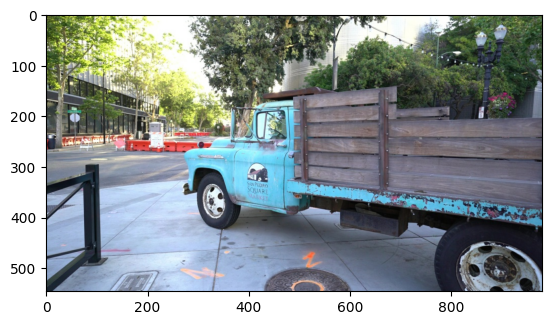

In [63]:
data1 = cv2.imread(colmap_dic_path + "im_" + colmap_idx + ".jpg")
data1 = cv2.cvtColor(data1, cv2.COLOR_BGR2RGB)
print(data1.shape)
plt.imshow(data1);

(376, 1241, 3)


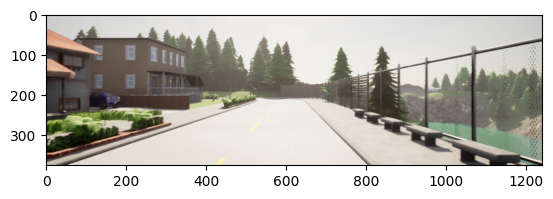

In [64]:
carla1 = cv2.imread(carla_path + "image_2/" +  carla_idx + ".png")
# carla1 = cv2.imread("/home/yiheng/Surfel/carlaDatasetTools/raw_data/record_2023_0424_1647/vehicle.tesla.model3.master/image_2/0000000009.png")
carla1 = cv2.cvtColor(carla1, cv2.COLOR_BGR2RGB)
print(carla1.shape)
plt.imshow(carla1);

(376, 1241, 3)


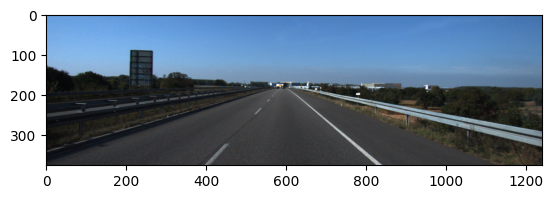

In [67]:
kitti1 = cv2.imread(kitti_path + "image_2/" + kitti_idx + ".png")
kitti1 = cv2.cvtColor(kitti1, cv2.COLOR_BGR2RGB)
print(kitti1.shape)
plt.imshow(kitti1);

## 2. dm_xxxxxxxx.npy

**scale: m, float**

the rendered depthmaps based on the COLMAP surface reconstruction

(546, 980)
0.0 55.43125


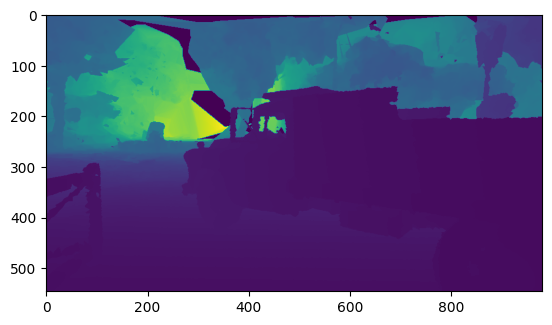

In [68]:
data2 = np.load(colmap_dic_path + "dm_" + colmap_idx + ".npy", allow_pickle=True)
print(data2.shape)
print(data2.min(), data2.max())
plt.imshow(data2);

(376, 1241)
20 234


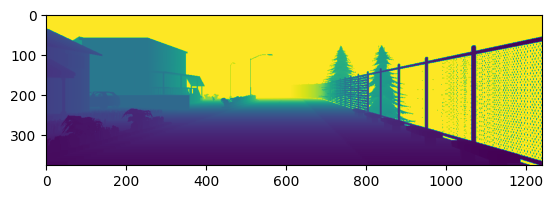

In [69]:
# depth_map = np.load(carla_path + "depth_2/" + carla_idx + ".npy", allow_pickle=True)
# print(depth_map.shape)
# print(depth_map.min(), depth_map.max())
# plt.imshow(depth_map);

carla2 = cv2.imread(carla_path + "depth_2/" + carla_idx + ".png", cv2.IMREAD_GRAYSCALE)
print(carla2.shape)
print(carla2.min(), carla2.max())
plt.imshow(carla2);

(376, 1241, 3) 0 255
5.748033866169087 60.0


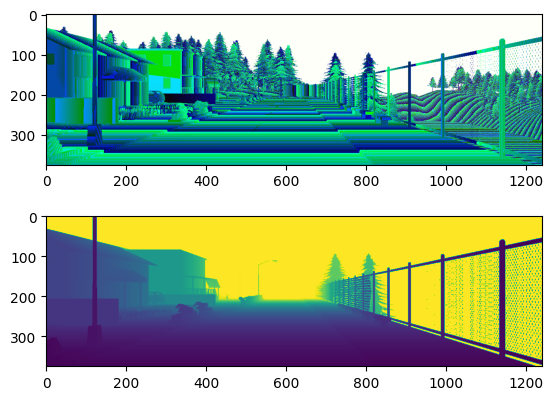

In [70]:
carla2_raw = cv2.imread(carla_path_raw + "depth_2/" + carla_idx + ".png")
print(carla2_raw.shape, carla2_raw.min(), carla2_raw.max())

depth_bgr = carla2_raw.astype(np.float64)
depth = depth_bgr[:,:,2] + depth_bgr[:,:,1]*256 + depth_bgr[:,:,0]*256*256
depth = depth / (256 * 256 * 256 - 1)
depth = depth * 1000
depth = np.clip(depth, 0, 60)
print(depth.min(), depth.max())

plt.subplot(211)
plt.imshow(carla2_raw);
plt.subplot(212)
plt.imshow(depth);

(376, 1241)
7 234


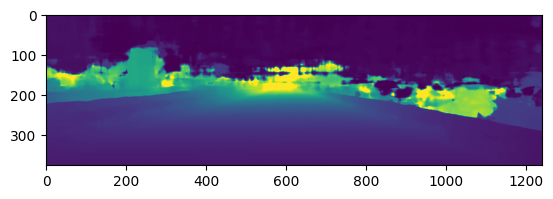

In [71]:
kitti2 = cv2.imread(kitti_path + "psmnet/" + kitti_idx + ".png", cv2.IMREAD_GRAYSCALE)
print(kitti2.shape)
print(kitti2.min(), kitti2.max())
plt.imshow(kitti2);

## 3. count_xxxxxxxx.npy

contains the overlap information from target images to source images. I.e., the number of pixels that can be mapped from the target image to the individual source images. np.argsort(np.load('count_00000000.npy'))[::-1] will give you the sorted indices of the most overlapping source images.

(251,)
[401782 411010 456626 453840 457200 428035 400085 401057 375239 391233
 424726 498857      0 457691 407817 343720 292116 252347 228888 215611
 191174 151903 129871 127375 129936 125534 130409 130358 131594 136819
 143786 152533 166620 173028 188617 210895 238047 255393 269130 284876
 300406 316125 316975 278511 238457 214735 210432 209434 213416 223917
 224803 225942 221668 222125 220942 219994 213019 134652  90171  67379
  59703  51972  41500  46536  43546  40969  42096  33001  24809  20309
  16511  19331  24685  30630  35898  41419  48233  53312  59362  65674
  67935  61511  51929  48170  42941  36694  29429  23803  18278  14916
  13476  13803  17963  25021  30887  38743  39546  45348  54180  58455
  63449  64980  64918  69703  75175  75859  78051  77950  87538 105065
 128257 148585 157159 155807 151243 159573 150447 155310 157589 148078
 146527 132566 218687 279263 284291 308657 344188 375522 393338 376977
 318030 327493 332007 326743 340140 377490 413126 380294 347497 300314

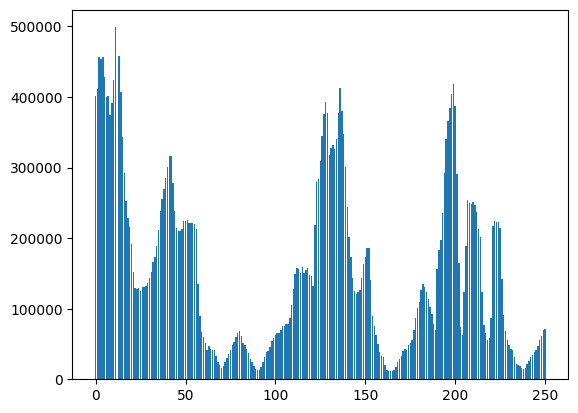

In [72]:
data3 = np.load(colmap_dic_path + "count_" + colmap_idx + ".npy", allow_pickle=True)
print(data3.shape)
print(data3)
plt.bar(np.arange(data3.shape[0]), data3);

In [47]:
print(np.argsort(data3)[::-1])

[ 11  13   4   2   3   5  10 199 136   1  14 198   0   7   6 128   9 200
 197 137 135 129 127   8 196 138 126  15 195 134 132 131 133 130  42  41
 125  40 139 194  16 201  39 124 123  43  38  37 207  17 210 208 209 211
 140  44  36 212 193  18  51  50 222  49 223 224  53  52  54  55 122 221
  19 225  45 213  48  56  35  46  47 214 141 192  20  34 206 152 151 191
 142  33 150  32 202 149 115 118 112 190 113 117  31  21 114 116 111 119
 120  30 148 143 226 153  29  57 182 121  28 183  26  27  24  22 110  23
 181 147 144  25 205 215 184 146 145 185 180 109 186 179 187 227  58 154
 108 220 178 188 106 107 216 105 155 104 203 250 189 177 103 249 228  80
  59 217  79 101 102 100 204 156  81 248  60  78 219  99 247 229 218 176
  98  77  61  82 175 157 174 230  76  83 246  63  97  64 231  84 172  66
 245  62 232  75 173  65 171  96 158  95 244  85  74 243 170  67 159 160
 233 242  94  73  86 169 241  93  68 168  72  87 240 234  69 235 161  71
 236  88  92 167  70 239 237  89 238  91  90 166 16

## 4. Ks.npy

contains the 3x3 intrinsic camera matrices, where Ks[idx] corresponds to the depth map dm_{idx:08d}.npy

In [12]:
data4 = np.load(colmap_dic_path + "Ks.npy", allow_pickle=True)
print(data4.shape)
print(data4[0])

(251, 3, 3)
[[581.78773191   0.         490.25      ]
 [  0.         581.78773191 272.75      ]
 [  0.           0.           1.        ]]


## 5. Rs.npy

In [13]:
data5 = np.load(colmap_dic_path + "Rs.npy", allow_pickle=True)
print(data5.shape)
print(data5[0])

(251, 3, 3)
[[ 0.99691859  0.00879406  0.07794859]
 [-0.00829108  0.99994268 -0.00677394]
 [-0.0780037   0.00610678  0.99693437]]


## 6. ts.npy

(251, 3)
[-1.15893849 -0.45901755  3.91884407]


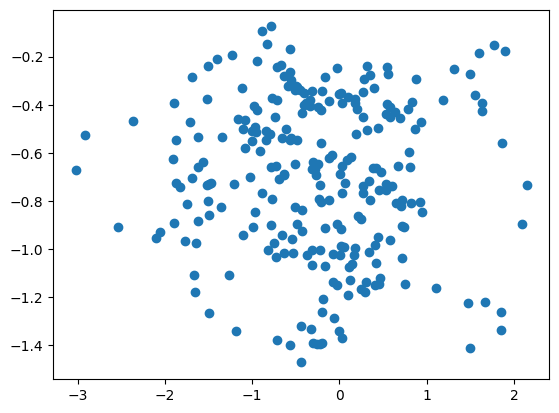

In [14]:
data6 = np.load(colmap_dic_path + "ts.npy", allow_pickle=True)
print(data6.shape)
print(data6[0])
plt.scatter(data6[:, 0], data6[:, 1]);

## 7. counts.npy

In [15]:
data7 = np.load(colmap_dic_path + "counts.npy", allow_pickle=True)
print(data7.shape)
print(data7)

(251, 251)
[[     0 527159 499123 ...  95514 103652 102801]
 [492778      0 497807 ...  92037 100290  99637]
 [430436 455553      0 ...  82380  91246  91444]
 ...
 [ 53397  55356  57746 ...      0 481468 458700]
 [ 50854  52763  55477 ... 423435      0 500085]
 [ 50019  51895  54648 ... 392943 485775      0]]


# Data transformer

In [218]:
dataset_shape = len(os.listdir(kitti_path + "image_2/"))
print(dataset_shape)

100


## 相机内参Ks

In [219]:
# 相机内参保存到Ks.npy文件中
with open(kitti_path + 'calibration.txt', 'r') as file:
    lines = file.readlines()

line1 = lines[0].strip().split()
fx, fy, cx, cy = map(float, line1)

# line2 = lines[1].strip().split()
# k1, k2 = map(float, line2)

k_matrix = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0,  0,  1]
])


print(k_matrix.shape)
print(k_matrix)

desired_shape = (dataset_shape, 3, 3)

reshaped_matrix = np.resize(k_matrix, desired_shape)
print(reshaped_matrix.shape)
print(reshaped_matrix[0])


path = svs_dic_path + "Ks.npy"
print(path)
np.save(path, reshaped_matrix)

(3, 3)
[[707.0912   0.     601.8873]
 [  0.     707.0912 183.1104]
 [  0.       0.       1.    ]]
(100, 3, 3)
[[707.0912   0.     601.8873]
 [  0.     707.0912 183.1104]
 [  0.       0.       1.    ]]
/home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/Ks.npy


In [220]:
svs_dic_path

'/home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/'

## 相机外参Rs和ts

In [221]:
filename = kitti_path + "pose.txt"

with open(filename, 'r') as file:
    lines = file.readlines()

# 转换每一行为R和t
rotation_matrices = []
translation_vectors = []

for line in lines:
    values = np.array(line.split(), dtype=float)  # 按空格分割每个值
    matrix = values.reshape(3, 4)

    rotation_matrix = matrix[:, :3].tolist()
    translation_vector = matrix[:, 3].tolist()

    # 添加到列表
    rotation_matrices.append(rotation_matrix)
    translation_vectors.append(translation_vector)

Rs = np.array(rotation_matrices)
ts = np.array(translation_vectors)

In [222]:
svs_dic_path

'/home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/'

In [223]:
print(Rs.shape, ts.shape)

(100, 3, 3) (100, 3)


In [224]:
np.save(svs_dic_path + 'Rs.npy', Rs)

In [225]:
np.save(svs_dic_path + 'ts.npy', ts)

## depth_map transformer

In [226]:
depth_dic_path = kitti_path + "psmnet/"
print(depth_dic_path)

rgb_dic_path = kitti_path + "image_2/"
print(rgb_dic_path)

/home/yiheng/Surfel/dataset/kitti-06/psmnet/
/home/yiheng/Surfel/dataset/kitti-06/image_2/


In [227]:
# (start_idx, end_idx) = 245, 345 # kitti01
# (start_idx, end_idx) = 594, 650 # kitti02
(start_idx, end_idx) = 50, 149 # kitti06

In [228]:
# 遍历原始数据集

out_idx = 1
for i in range(start_idx, end_idx+1):
    # 原始图像文件名
    original_filename = "{:06d}.png".format(i)
    original_filepath = os.path.join(depth_dic_path, original_filename)

    # 新数据集文件名
    new_filename = "dm_{:08d}.npy".format(out_idx)
    new_filepath = os.path.join(svs_dic_path, new_filename)

    print(original_filepath, "----->>>>", new_filepath)

    # # 读取图像
    image = cv2.imread(original_filepath)
    depth_bgr = image.astype(np.float64)
    depth = depth_bgr[:,:,2] + depth_bgr[:,:,1]*256 + depth_bgr[:,:,0]*256*256
    depth = depth / (256 * 256 * 256 - 1)
    depth = depth * 1000                        # meter
    depth = np.clip(depth, 0, 60)

    # # 保存为.npy文件
    np.save(new_filepath, depth)



    # 原始图像文件名
    original_filename = "{:06d}.png".format(i)
    original_filepath = os.path.join(rgb_dic_path, original_filename)

    # 新数据集文件名
    new_filename = "im_{:08d}.jpg".format(out_idx)
    new_filepath = os.path.join(svs_dic_path, new_filename)
    out_idx +=1

    print(original_filepath, "----->>>>", new_filepath)

    # # 读取图像
    image = cv2.imread(original_filepath)

    # # 保存为.npy文件
    cv2.imwrite(new_filepath, image)

/home/yiheng/Surfel/dataset/kitti-06/psmnet/000050.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/dm_00000001.npy
/home/yiheng/Surfel/dataset/kitti-06/image_2/000050.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/im_00000001.jpg
/home/yiheng/Surfel/dataset/kitti-06/psmnet/000051.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/dm_00000002.npy
/home/yiheng/Surfel/dataset/kitti-06/image_2/000051.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/im_00000002.jpg
/home/yiheng/Surfel/dataset/kitti-06/psmnet/000052.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/dm_00000003.npy
/home/yiheng/Surfel/dataset/kitti-06/image_2/000052.png ----->>>> /home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/im_00000003.jpg
/home/yiheng/Surfel/dataset/kitti-06/psmnet/000053.png ----->>>> /home/yiheng/Projects/colm

## rgb_image transformer

## counts.npy 匹配矩阵
处理完colmap之后

In [172]:
colmap_dic_path = '/home/yiheng/Surfel/dataset/colmap_kitti01/'

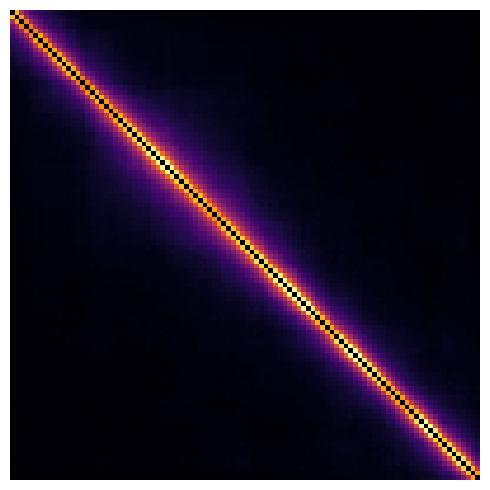

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个200行200列的全零矩阵
confusion_matrix = np.zeros((dataset_shape, dataset_shape))

# 打开文本文件
with open(colmap_dic_path + "export.txt", 'r') as file:
    # 逐行读取文件内容
    for line in file:
        # 解析文件名和数值
        filename1, filename2, value = line.split()
        
        # 将文件名转换为对应的行索引和列索引
        row_index = int(filename1[:-4]) - start_idx
        col_index = int(filename2[:-4]) - start_idx
        
        # 将数值存储到混淆矩阵的相应位置
        confusion_matrix[row_index, col_index] = int(value)

# 补全矩阵
confusion_matrix = confusion_matrix + confusion_matrix.T - np.diag(confusion_matrix.diagonal())

plt.figure(figsize=(5, 5))
# 绘制热力图
plt.imshow(confusion_matrix, cmap='inferno')

# 关闭坐标轴显示
plt.axis('off')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

np.save(svs_dic_path + 'counts.npy', confusion_matrix)


In [230]:
confusion_matrix.shape

(100, 100)

In [231]:
svs_dic_path

'/home/yiheng/Projects/colmap_dic/training/Kitti06/dense/ibr3d_pw_0.50/'

# Check generated dataset

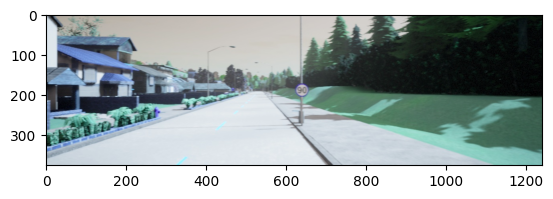

In [145]:
plt.imshow(image1)

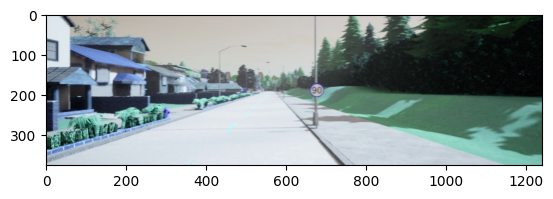

In [146]:
plt.imshow(image2)

重叠区域像素数量: 1380031


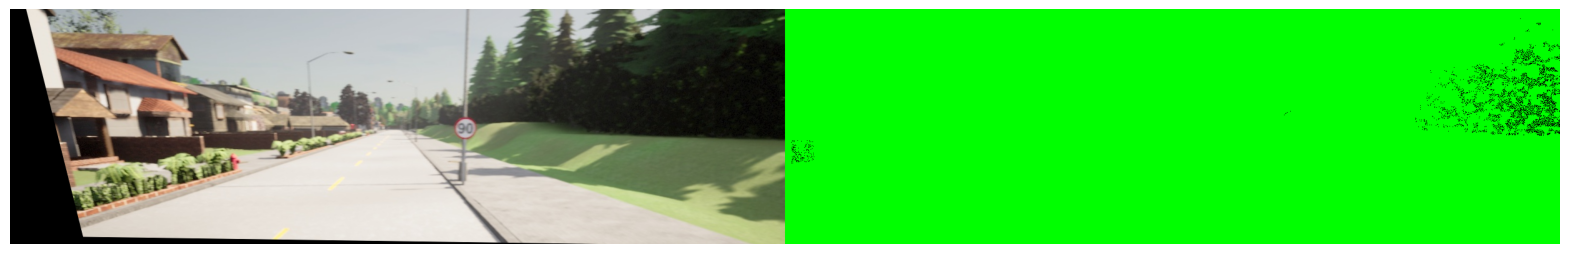

In [171]:
import cv2
import numpy as np

# 读取两张图片
frame1 = cv2.imread(generated_data_dic_path+'im_00000092.jpg')
frame2 = cv2.imread(generated_data_dic_path+'im_00000099.jpg')

# 转换为灰度图像
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# 创建SIFT特征提取器
sift = cv2.SIFT_create()

# 检测关键点和计算描述符
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# 创建FLANN匹配器
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# 特征匹配
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# 进行比率测试，筛选出好的匹配点
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 提取关键点的坐标
points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 计算单应性矩阵
H, _ = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)

# 获取第一张图片的宽度和高度
h1, w1 = frame1.shape[:2]

# 使用单应性矩阵将第一张图片投影到第二张图片上
warped_image = cv2.warpPerspective(frame1, H, (w1, h1))

# 将两张图片合并为一张图片
combined_image = np.concatenate((warped_image, frame2), axis=1)

# 计算重叠区域像素数量
overlap_pixels = np.sum(combined_image[:, w1:] > 0)

print("重叠区域像素数量:", overlap_pixels)

# 在两张图片上绘制重叠区域
result = combined_image.copy()
result[:, w1:, :] = np.where(result[:, w1:, :] > 0, [0, 255, 0], result[:, w1:, :])

plt.figure(figsize=(20, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [165]:
frame1.shape

(376, 1241, 3)

In [166]:
376 * 1241

466616

## COLMAP 转四元数
IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME

In [172]:
!pwd

/home/yiheng/Projects/StableViewSynthesis


In [197]:
import numpy as np

# 读取文本文件
filename = '/home/yiheng/Surfel/dataset/carla_vis_blank/pose.txt'
with open(filename, 'r') as file:
    lines = file.readlines()

# 转换每一行为R和t
rotation_matrices = []
translation_vectors = []

for line in lines:
    values = np.array(line.split(), dtype=float)  # 按空格分割每个值
    matrix = values.reshape(3, 4)

    rotation_matrix = matrix[:, :3].tolist()
    translation_vector = matrix[:, 3].tolist()

    # 添加到列表
    rotation_matrices.append(rotation_matrix)
    translation_vectors.append(translation_vector)

rotations = np.array(rotation_matrices)
translations = np.array(translation_vectors)

In [190]:
quaternions = [quaternion.from_rotation_matrix(rot) for rot in rotations]

In [207]:
import numpy as np
import quaternion

# 将旋转矩阵转换为四元数
quaternions = np.zeros((len(rotations), 4))
for i, rotation_matrix in enumerate(rotations):
    quat = quaternion.from_rotation_matrix(rotation_matrix)
    quaternions[i] = quaternion.as_float_array(quat)

# 生成IMAGE_ID和CAMERA_ID
image_ids = np.arange(len(quaternions))
camera_ids = np.ones(len(quaternions), dtype=int)  # 将所有camera_id设置为1

# 定义NAME
names = [f"{i:010d}.png" for i in range(len(quaternions))]

# 将数据写入txt文件
output_filename = '/home/yiheng/Surfel/dataset/carla_vis_blank/output.txt'
with open(output_filename, 'w') as file:
    for image_id, quaternion, translation, camera_id, name in zip(image_ids, quaternions, translations, camera_ids, names):
        qw, qx, qy, qz = quaternion
        tx, ty, tz = translation
        file.write(f"{image_id} {qw} {qx} {qy} {qz} {tx} {ty} {tz} {camera_id} {name}\n\n")

print("转换完成并已写入output.txt文件。")


转换完成并已写入output.txt文件。
